Importing neccesary libaries

In [9]:
import networkx as nx 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.sparse import csc_matrix
import scipy.sparse
from scipy.io import loadmat

Reading the Homo_sapiens.mat (with variables network and group) file:
1. loadmat is imported from scipy.io
2. the loadmat function is used to load the Homo_sapiens.mat and assigned to x variable
3. The two variables 'network' and 'group' are assigned to net and grp respectively.

In [10]:
x = loadmat('Homo_sapiens.mat')
net = x['network']
grp = x['group']

Reading the variable network from the Homo_sapiens.mat file, and assigned to new variable named "net".

In [11]:
net = loadmat('Homo_sapiens.mat')['network']

Converting the network variable, net, to a Graph


In [12]:
N = nx.Graph(net)

Checking whether the Network, N, is connected or not. It returns "False". This implies it is not connected.

In [84]:
 print(nx.is_connected(N))

False


Finding out the number of the connected components of the network N by:
1. Getting the list of the connected components and printing the information
2. Getting the size of the list

In [14]:
num = [len(c) for c in sorted(nx.connected_components(N), key=len, reverse=True)]
print(num)
len(num)

[3852, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


35

Degeree of Centrality is calculated as dc

In [15]:
dc = nx.degree_centrality(N)

Closeness Centrality is calculated as cc

In [16]:
cc = nx.closeness_centrality(N)

Betweenness Centrality is calculated as bc

In [19]:
bc = nx.betweenness_centrality(N)

Harmonic Centrality is calculated as hc

In [20]:
hc = nx.harmonic_centrality(N)

Eigenvector Centrality as ec

In [21]:
ec = nx.eigenvector_centrality(N)

Clustering Coefficient is calculated as coeff

In [22]:
coeff = nx.clustering(N)

Page Rank is calculated as pr

In [23]:
pr = nx.pagerank(N)

The values of each of the measures calculated are written into a csv file named measures.csv. These are computed into single values for each of the respective measures

In [61]:
with open ("measures.csv", "w+") as measures:
    for i in range (len(pr)):
        measure = ""
        measure += str(dc[i])
        measure +=  "," + str(cc[i])
        measure += "," + str(bc[i])
        measure += "," + str(hc[i])
        measure += "," + str(ec[i])
        measure += "," + str(coeff[i])
        measure += ","+ str(pr[i])
        measure += ("\n")
        measures.write(measure)

The measures.csv file has a new line to serve as its headings. These are the labels for the respective measures calculated

In [62]:
import csv
with open('measures.csv',newline='') as file:
    read = csv.reader(file)
    data = [line for line in read]
with open('measures.csv','w',newline='') as file:
    w = csv.writer(file)
    w.writerow(['dc', 'cc', 'bc','hc','ec','coeff','pr'])
    w.writerows(data)

In [107]:
df = pd.read_csv("measures.csv", sep=",")

The first five rows of the measures.csv file is displayed

In [71]:
df.head(5)

,dc,cc,bc,hc,ec,coeff,pr
0,0.004628,0.340267,0.000150,1385.983333,0.005560,0.098039,0.000232
1,0.003343,0.345445,0.000034,1412.633333,0.012950,0.435897,0.000158
2,0.000514,0.261494,0.000013,1048.350000,0.000146,0.000000,0.000078
3,0.000771,0.288346,0.000001,1156.816667,0.000363,0.000000,0.000074
4,0.008485,0.359345,0.000389,1477.833333,0.011674,0.176344,0.000395


The histograms for each of the measures are displayed:

1. Histogram for Degree Centrality

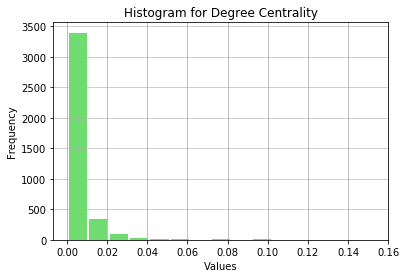

In [96]:
df['dc'].plot.hist(grid=True, bins=15, rwidth=0.9,color='#70db70')
plt.title('Histogram for Degree Centrality')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

2. Histogram for Closeness Centrality


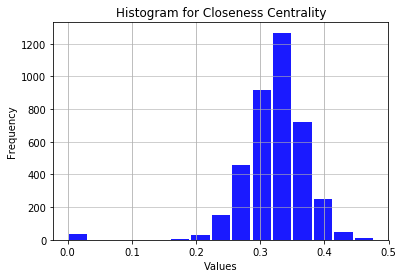

In [98]:
df['cc'].plot.hist(grid=True, bins=15, rwidth=0.9,color='#1a1aff')
plt.title('Histogram for Closeness Centrality')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

3. Histogram for Betweenness Centrality


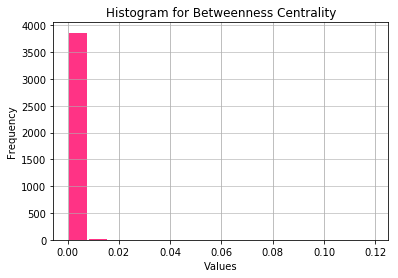

In [99]:
df['bc'].plot.hist(grid=True, bins=15, rwidth=0.9,color='#ff3385')
plt.title('Histogram for Betweenness Centrality')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

4. Histogram for Harmonic Centrality


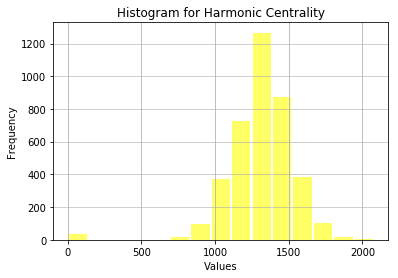

In [100]:
df['hc'].plot.hist(grid=True, bins=15, rwidth=0.9,color='#ffff66')
plt.title('Histogram for Harmonic Centrality')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

5. Histogram for Eigenvector Centrality


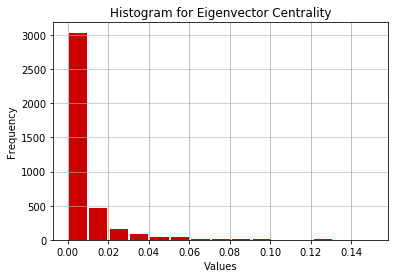

In [101]:
df['ec'].plot.hist(grid=True, bins=15, rwidth=0.9,color='#cc0000')
plt.title('Histogram for Eigenvector Centrality')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

6. Histogram for Clustering Coefficient


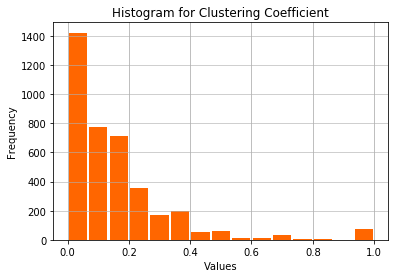

In [102]:
df['coeff'].plot.hist(grid=True, bins=15, rwidth=0.9,color='#ff6600')
plt.title('Histogram for Clustering Coefficient')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

7. Histogram for PageRank


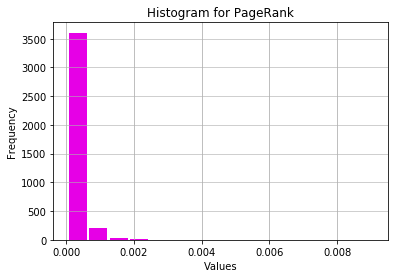

In [103]:
df['pr'].plot.hist(grid=True, bins=15, rwidth=0.9,color='#e600e6')
plt.title('Histogram for PageRank')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

Power Law computation to check the fitness of the degree of centrality

In [108]:
type(df['dc'])

pandas.core.series.Series

In [106]:
#import powerlaw
#data_dc = array(df['dc'])
#results = powerlaw.Fit(data_dc)
#print(results.power_law.alpha)
#print(results.power_law.xmin)
#R, p = results.distribution_compare('power_law', 'lognormal')